# Bilgisayar Kavramları Predict Algoritmaları

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
veriler = pd.read_csv("satislar.csv")

In [4]:
veriler

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5
5,19,28321.0
6,19,30075.0
7,20,27222.5
8,20,32222.5
9,24,28594.5


In [5]:
aylar = veriler[["Aylar"]]
satislar = veriler[["Satislar"]]

In [6]:
aylar.head()

,Aylar
0,8
1,10
2,11
3,13
4,14


In [7]:
satislar.head()

,Satislar
0,19671.5
1,23102.5
2,18865.5
3,21762.5
4,19945.5


In [8]:
satislar2 = veriler.iloc[:,:1].values
satislar2  ##array çevirdik

array([[ 8],
       [10],
       [11],
       [13],
       [14],
       [19],
       [19],
       [20],
       [20],
       [24],
       [25],
       [25],
       [25],
       [26],
       [29],
       [31],
       [32],
       [34],
       [37],
       [37],
       [42],
       [44],
       [49],
       [50],
       [54],
       [55],
       [59],
       [59],
       [64],
       [65]])

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(aylar,satislar,test_size =0.33,random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [11]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [12]:
x_train[0:5]

array([[-0.70368853],
       [ 0.15126015],
       [-0.63792324],
       [-0.0460357 ],
       [ 1.33503524]])

In [13]:
x_test[0:5]

array([[-1.68268756],
       [ 1.33023274],
       [-0.82997427],
       [-0.88682182],
       [ 1.04599497]])

In [14]:
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
tahmin = lr.predict(x_test)

In [18]:
tahmin  # xtestten çıkan tahmin sonuçları  gerçek y_test değerleri ile bunları karşılaştırabiliriz

array([[-1.33324088],
       [ 1.05398097],
       [-0.65761206],
       [-0.70265398],
       [ 0.82877136],
       [ 0.60356175],
       [ 0.82877136],
       [-0.70265398],
       [-0.29727668],
       [ 0.37835214]])

In [19]:
y_test  #bunlar gerçek değerler

array([[-1.66597621],
       [ 1.25819492],
       [-0.99762385],
       [-0.7856508 ],
       [ 1.0709181 ],
       [ 0.81055426],
       [ 0.92122098],
       [-1.04207705],
       [-0.09933754],
       [ 0.52977719]])

Fit transform bölümünü yapmadan tekrar işlem yapınca sonuçları birebire görebilriiz

In [20]:
x_train , x_test , y_train , y_test = train_test_split(aylar,satislar,test_size =0.33,random_state = 0)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
tahmin = lr.predict(x_test)

In [23]:
tahmin  #burada dönüşüm yapmadan asıl orj değerleri görebiliriz

array([[20126.21865404],
       [57740.29412655],
       [30771.7117123 ],
       [30062.01217508],
       [54191.79644047],
       [50643.29875438],
       [54191.79644047],
       [30062.01217508],
       [36449.30801003],
       [47094.80106829]])

In [24]:
y_test   #gerçek değerler

,Satislar
2,18865.5
28,61195.5
13,28540.5
10,31609.0
26,58484.5
24,54715.5
27,56317.5
11,27897.0
17,41544.0
22,50651.0


Bu verileri görselleştirebiliriz

In [25]:
#verileri rastgele dağıtımız için sıralamamız gerekiyor

In [26]:
x_train = x_train.sort_index()
y_train = y_train.sort_index()

In [27]:
x_train

,Aylar
0,8
1,10
3,13
4,14
5,19
6,19
7,20
8,20
9,24
12,25


In [28]:
y_train

,Satislar
0,19671.5
1,23102.5
3,21762.5
4,19945.5
5,28321.0
6,30075.0
7,27222.5
8,32222.5
9,28594.5
12,28478.5


In [29]:
# plt.plot(x_train,y_train)  hata veriyor sebebini çözemedim

# Çoklu DOğrusal Regresyon

In [30]:
veriler = pd.read_csv("veriler.csv")
veriler

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [31]:
from sklearn import preprocessing

In [32]:
le = preprocessing.LabelEncoder()

In [33]:
ulke = veriler.iloc[:,0:1].values
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
ulke[:,0] = le.fit_transform(veriler.iloc[:,0])
ohe = preprocessing.OneHotEncoder()
ulke = ohe.fit_transform(ulke).toarray()
ulke

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [34]:
c = veriler.iloc[:,-1:].values
c[:,-1] = le.fit_transform(veriler.iloc[:,-1])
ohe = preprocessing.OneHotEncoder()
c = ohe.fit_transform(c).toarray()
c

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [35]:
yas = veriler["yas"]
kilo = veriler["kilo"]
boy = veriler["boy"]

In [36]:
sonuc = pd.DataFrame(data=ulke, index = range(22), columns = ['fr','tr','us'])
sonuc2 = pd.DataFrame(data=yas, index = range(22), columns = ['yas'])
cinsiyet = veriler.iloc[:,-1].values
sonuc3 = pd.DataFrame(data = c[:,:1], index = range(22), columns = ['cinsiyet'])
sonuc4 = pd.DataFrame(data=boy, index = range(22), columns = ['boy'])
sonuc5 = pd.DataFrame(data=kilo, index = range(22), columns = ['kilo'])

In [37]:
s=pd.concat([sonuc,sonuc2], axis=1)
s2=pd.concat([s,sonuc3], axis=1)
s3=pd.concat([s2,sonuc4], axis=1)
s4 = pd.concat([s3,sonuc5],axis = 1)

In [38]:
s4

,fr,tr,us,yas,cinsiyet,boy,kilo
0,0.0,1.0,0.0,10,1.0,130,30
1,0.0,1.0,0.0,11,1.0,125,36
2,0.0,1.0,0.0,10,0.0,135,34
3,0.0,1.0,0.0,9,0.0,133,30
4,0.0,1.0,0.0,12,1.0,129,38
5,0.0,1.0,0.0,30,1.0,180,90
6,0.0,1.0,0.0,25,1.0,190,80
7,0.0,1.0,0.0,35,1.0,175,90
8,0.0,1.0,0.0,22,0.0,177,60
9,0.0,0.0,1.0,33,1.0,185,105


In [39]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred =regressor.predict(x_test)

In [41]:
y_pred 

array([[20126.21865404],
       [57740.29412655],
       [30771.7117123 ],
       [30062.01217508],
       [54191.79644047],
       [50643.29875438],
       [54191.79644047],
       [30062.01217508],
       [36449.30801003],
       [47094.80106829]])

In [42]:
y_test

,Satislar
2,18865.5
28,61195.5
13,28540.5
10,31609.0
26,58484.5
24,54715.5
27,56317.5
11,27897.0
17,41544.0
22,50651.0


In [43]:
# 2 tane hatalı veri var diğerlerini doğru kabul edebiliriz

In [44]:
s4

,fr,tr,us,yas,cinsiyet,boy,kilo
0,0.0,1.0,0.0,10,1.0,130,30
1,0.0,1.0,0.0,11,1.0,125,36
2,0.0,1.0,0.0,10,0.0,135,34
3,0.0,1.0,0.0,9,0.0,133,30
4,0.0,1.0,0.0,12,1.0,129,38
5,0.0,1.0,0.0,30,1.0,180,90
6,0.0,1.0,0.0,25,1.0,190,80
7,0.0,1.0,0.0,35,1.0,175,90
8,0.0,1.0,0.0,22,0.0,177,60
9,0.0,0.0,1.0,33,1.0,185,105


In [45]:
sol = s4.iloc[:,:5]
sag = s4.iloc[:,-1:]
veri = pd.concat([sol,sag],axis = 1)
veri  #boy olmayan bir veri oluşturduk


,fr,tr,us,yas,cinsiyet,kilo
0,0.0,1.0,0.0,10,1.0,30
1,0.0,1.0,0.0,11,1.0,36
2,0.0,1.0,0.0,10,0.0,34
3,0.0,1.0,0.0,9,0.0,30
4,0.0,1.0,0.0,12,1.0,38
5,0.0,1.0,0.0,30,1.0,90
6,0.0,1.0,0.0,25,1.0,80
7,0.0,1.0,0.0,35,1.0,90
8,0.0,1.0,0.0,22,0.0,60
9,0.0,0.0,1.0,33,1.0,105


In [46]:
x_train, x_test,y_train,y_test = train_test_split(veri,boy,test_size = 0.33,random_state = 0)

In [47]:
r2 = LinearRegression()
r2.fit(x_train,y_train)
y_pred = r2.predict(x_test)

In [48]:
x_test  #tahmin edilen veri

,fr,tr,us,yas,cinsiyet,kilo
20,1.0,0.0,0.0,32,0.0,66
10,0.0,0.0,1.0,27,0.0,55
14,0.0,0.0,1.0,55,0.0,62
13,0.0,0.0,1.0,41,0.0,59
1,0.0,1.0,0.0,11,1.0,36
21,1.0,0.0,0.0,42,0.0,56
11,0.0,0.0,1.0,44,0.0,50
19,1.0,0.0,0.0,29,0.0,40


In [49]:
y_test #gerçek değerler

20    164
10    165
14    167
13    162
1     125
21    166
11    155
19    159
Name: boy, dtype: int64

In [50]:
y_pred  #tahmin edilenler

array([182.26638686, 152.87161474, 162.79386375, 158.30668577,
       130.82888952, 173.96138408, 150.12782663, 157.26898922])

In [51]:
#veriler oldukça yakın tahmin edilmiş mükemmel değil fakat iş görür

In [52]:
import statsmodels.api as sm
X = np.append(arr = np.ones((22,1)).astype(int),values = veri,axis = 1) #dizinin başına 1 den oluşan kolon ekledik
X_l = veri.iloc[:,[0,1,2,3,4,5]].values #bunu yapma sebebi eleme yaparken bazı kolonları çıkartabilmek
X_l = np.array(X_l,dtype =float)
model = sm.OLS(boy,X_l).fit()

In [53]:
model.summary()  #yukarıdaki tüm olay bu tabloyu çıkarabilmek için

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    boy   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           5.41e-07
Time:                        04:26:42   Log-Likelihood:                -73.950
No. Observations:                  22   AIC:                             159.9
Df Residuals:                      16   BIC:                             166.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           114.0688      8.145     14.005      0.000      96.802     131.335
x2           108.3030      5.736     18.880      0.000      96.143     120.463
x3           104.4714      9.195     11.361      0.000      84.978     123.964
x4             0.0814      0.221      0.369      0.717      -0.386       0.549
x5           -10.5980      5.052     -2.098      0.052     -21.308       0.112
x6             0.9211      0.119      7.737      0.000       0.669       1.174
==============================================================================
Omnibus:                        1.031   Durbin-Watson:                   2.759
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.624
Skew:                           0.407   Prob(JB):                        0.732
Kurtosis:                       2.863   Cond. No.                         524.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P değeri ne kadar düşükse o kadar iyi burada en yüksek p değerini eleriz

In [54]:

X_l = veri.iloc[:,[0,1,2,3,5]].values #b5. elamanı eledik
X_l = np.array(X_l,dtype =float)
model = sm.OLS(boy,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    boy   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     24.80
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           6.63e-07
Time:                        04:26:42   Log-Likelihood:                -76.623
No. Observations:                  22   AIC:                             163.2
Df Residuals:                      17   BIC:                             168.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           115.2550      8.901     12.949      0.000      96.476     134.034
x2           107.7369      6.277     17.164      0.000      94.494     120.980
x3           108.1858      9.884     10.945      0.000      87.331     129.040
x4             0.2083      0.232      0.896      0.383      -0.282       0.698
x5             0.7586      0.099      7.660      0.000       0.550       0.968
==============================================================================
Omnibus:                        3.252   Durbin-Watson:                   2.976
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                1.976
Skew:                           0.727   Prob(JB):                        0.372
Kurtosis:                       3.200   Cond. No.                         520.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X_l = veri.iloc[:,[0,1,2,3]].values #b5. elamanı eledik
X_l = np.array(X_l,dtype =float)
model = sm.OLS(boy,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    boy   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     3.212
Date:                Wed, 27 Jul 2022   Prob (F-statistic):             0.0477
Time:                        04:26:42   Log-Likelihood:                -93.049
No. Observations:                  22   AIC:                             194.1
Df Residuals:                      18   BIC:                             198.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           147.5989     16.066      9.187      0.000     113.845     181.353
x2           137.2571     10.159     13.511      0.000     115.914     158.600
x3           131.9817     19.241      6.860      0.000      91.559     172.405
x4             0.8456      0.445      1.901      0.073      -0.089       1.780
==============================================================================
Omnibus:                        5.576   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                2.350
Skew:                           0.483   Prob(JB):                        0.309
Kurtosis:                       1.724   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Ödevin çözümü

In [56]:
veriler = pd.read_csv("odev_tenis.csv")

In [57]:
veriler

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [58]:
 play = veriler.iloc[:,-1:].values

In [59]:
play

array([['no'],
       ['no'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['no'],
       ['yes'],
       ['no'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['no']], dtype=object)

In [60]:
play[:,-1] = le.fit_transform(veriler.iloc[:,-1])
play   # yes ler 1 oldu no lar 0

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]], dtype=object)

In [61]:
windy = veriler.iloc[:,-2:-1].values
windy

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True]])

In [62]:
windy[:,-1] = le.fit_transform(veriler.iloc[:,-1])
windy

array([[False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False]])

Farklı bir yöntem 

In [63]:
from sklearn import preprocessing
veriler2 = veriler.apply(preprocessing.LabelEncoder().fit_transform)   #tüm veriler üzerinde işlem yapar  #diğer verileri bozar

In [64]:
c = veriler2.iloc[:,:1]
c
c = ohe.fit_transform(c).toarray()
c  #ilk kolon c olarak düzenlenmiş halde

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [65]:
# SIRASIYLA İNŞA EDELİM

In [66]:
havadurumu = pd.DataFrame(data = c,index = range(14),columns=["o","r","s"])

In [67]:
sonveriler = pd.concat([havadurumu,veriler.iloc[:,1:3]],axis = 1)

In [68]:
sonveriler = pd.concat([veriler2.iloc[:,-2:],sonveriler],axis= 1)

In [69]:
sonveriler  #veriyi tekrar inşa etmiş olduk

,windy,play,o,r,s,temperature,humidity
0,0,0,0.0,0.0,1.0,85,85
1,1,0,0.0,0.0,1.0,80,90
2,0,1,1.0,0.0,0.0,83,86
3,0,1,0.0,1.0,0.0,70,96
4,0,1,0.0,1.0,0.0,68,80
5,1,0,0.0,1.0,0.0,65,70
6,1,1,1.0,0.0,0.0,64,65
7,0,0,0.0,0.0,1.0,72,95
8,0,1,0.0,0.0,1.0,69,70
9,0,1,0.0,1.0,0.0,75,80


**Ön işleme bitti tahmine geçebiliriz**

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sonveriler.iloc[:,:-1],sonveriler.iloc[:,-1:],test_size = 0.33,random_state = 0)

In [71]:
x_train

,windy,play,o,r,s,temperature
13,1,0,0.0,1.0,0.0,71
9,0,1,0.0,1.0,0.0,75
1,1,0,0.0,0.0,1.0,80
7,0,0,0.0,0.0,1.0,72
10,1,1,0.0,0.0,1.0,75
3,0,1,0.0,1.0,0.0,70
0,0,0,0.0,0.0,1.0,85
5,1,0,0.0,1.0,0.0,65
12,0,1,1.0,0.0,0.0,81


In [72]:
y_train

,humidity
13,91
9,80
1,90
7,95
10,70
3,96
0,85
5,70
12,75


In [73]:
x_test

,windy,play,o,r,s,temperature
8,0,1,0.0,0.0,1.0,69
6,1,1,1.0,0.0,0.0,64
4,0,1,0.0,1.0,0.0,68
11,1,1,1.0,0.0,0.0,72
2,0,1,1.0,0.0,0.0,83


In [74]:
y_test

,humidity
8,70
6,65
4,80
11,90
2,86


In [75]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_pred  #yukarıdaki y teste göre karşılaştırabiliriz

array([[84.45365573],
       [63.93839954],
       [85.76050662],
       [64.21013241],
       [75.06793322]])

In [76]:
import statsmodels.api as sm
X = np.append(arr = np.ones((14,1)).astype(int),values = sonveriler.iloc[:,:-1],axis = 1)
X_l = sonveriler.iloc[:,[0,1,2,3,4,5]].values
X_l = np.array(X_l,dtype = float)
model = sm.OLS(sonveriler.iloc[:,-1:],X_l).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               humidity   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                 -0.148
Method:                 Least Squares   F-statistic:                    0.6653
Date:                Wed, 27 Jul 2022   Prob (F-statistic):              0.661
Time:                        04:26:43   Log-Likelihood:                -49.542
No. Observations:                  14   AIC:                             111.1
Df Residuals:                       8   BIC:                             114.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.0286      7.229     -0.557      0.593     -20.698      12.641
x2            -8.2778      8.029     -1.031      0.333     -26.793      10.237
x3            52.3891     50.214      1.043      0.327     -63.404     168.183
x4            55.6337     45.233      1.230      0.254     -48.673     159.940
x5            49.4291     48.337      1.023      0.336     -62.035     160.893
x6             0.4920      0.597      0.825      0.433      -0.884       1.868
==============================================================================
Omnibus:                        0.935   Durbin-Watson:                   2.416
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.823
Skew:                           0.389   Prob(JB):                        0.663
Kurtosis:                       2.103   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
# P değerleri çok ama çok yüksek en yüksekten elemeye başlayacağız

In [78]:
sonveriler = sonveriler.iloc[:,1:]

In [79]:
sonveriler  # windy kolonunu attık p si en yüksek olduğu için

,play,o,r,s,temperature,humidity
0,0,0.0,0.0,1.0,85,85
1,0,0.0,0.0,1.0,80,90
2,1,1.0,0.0,0.0,83,86
3,1,0.0,1.0,0.0,70,96
4,1,0.0,1.0,0.0,68,80
5,0,0.0,1.0,0.0,65,70
6,1,1.0,0.0,0.0,64,65
7,0,0.0,0.0,1.0,72,95
8,1,0.0,0.0,1.0,69,70
9,1,0.0,1.0,0.0,75,80


In [80]:
X_l = sonveriler.iloc[:,[0,1,2,3,4]].values
X_l = np.array(X_l,dtype = float)
model = sm.OLS(sonveriler.iloc[:,-1:],X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               humidity   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.8165
Date:                Wed, 27 Jul 2022   Prob (F-statistic):              0.546
Time:                        04:26:44   Log-Likelihood:                -49.809
No. Observations:                  14   AIC:                             109.6
Df Residuals:                       9   BIC:                             112.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.2865      6.909     -0.910      0.387     -21.916       9.343
x2            36.6564     39.905      0.919      0.382     -53.615     126.927
x3            41.9135     36.464      1.149      0.280     -40.573     124.400
x4            35.1064     39.339      0.892      0.395     -53.884     124.097
x5             0.6484      0.506      1.282      0.232      -0.496       1.793
==============================================================================
Omnibus:                        0.887   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.810
Skew:                           0.424   Prob(JB):                        0.667
Kurtosis:                       2.181   Cond. No.                     1.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
x_train = x_train.iloc[:,1:]
x_test = x_test.iloc[:,1:]
# tekrardan sistemi egiteceğiz windyi çıkarttık çünkü

In [82]:
regressor.fit(x_train,y_train)
y_pred2 = regressor.predict(x_test)

In [83]:
y_pred  #wilk tahmin

array([[84.45365573],
       [63.93839954],
       [85.76050662],
       [64.21013241],
       [75.06793322]])

In [84]:
y_pred2 #windy çıkınca tahmin  #veriler gerçeğe daha da yaklaşmış çünkü windy nin p değeri çok yüksekti

array([[77.98135142],
       [68.29304916],
       [81.05037539],
       [71.44926132],
       [75.78905304]])

In [85]:
y_test

,humidity
8,70
6,65
4,80
11,90
2,86


In [86]:
#bunu devam ettirebiliriz aynı şekilde 

# Polynomial Regression

In [87]:
veriler= pd.read_csv("maaslar.csv")

In [88]:
veriler

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [89]:
x = veriler.iloc[:,1:2]
y = veriler.iloc[:,2:]

In [90]:
x

,Egitim Seviyesi
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [91]:
y

,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


In [92]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [93]:
lin_reg = LinearRegression()
lin_reg.fit(x.values,y.values)  #x den y yi öğren

LinearRegression()

NameError: name 'lin_reg2' is not defined

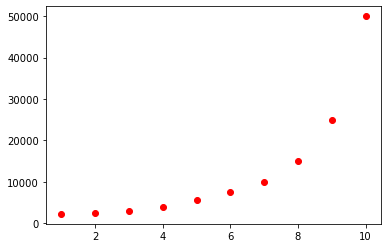

In [94]:
plt.scatter(x.values,y.values,color = "red")
plt.plot(x.values,lin_reg2.predict(poly_reg.fit_transform(x.values)),color = "blue")

In [ ]:
lin_reg.predict(x.values)

In [ ]:
y

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)

x_poly = poly_reg.fit_transform(x.values)

In [ ]:
x_poly

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)

plt.scatter(x.values,y.values)

In [ ]:
lin_reg2.predict(poly_reg.fit_transform(x.values))
poly_reg.fit_transform(x.values)

In [ ]:
lin_reg.predict([[11]])

In [ ]:
lin_reg2.predict(poly_reg.fit_transform([[6.6]]))

# Support Vector Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc1 = StandardScaler()

In [ ]:
x_olcekli = sc1.fit_transform(x.values)

In [95]:
sc2 = StandardScaler()

In [96]:
y_olcekli = sc2.fit_transform(y.values)

In [97]:
from sklearn.svm import SVR

In [98]:
svr_reg = SVR(kernel = "rbf")

In [99]:
svr_reg.fit(x_olcekli,y_olcekli)

NameError: name 'x_olcekli' is not defined

In [100]:
plt.scatter(x_olcekli,y_olcekli,color = "red")   #veri noktaları 
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color = "blue")  #herbir data point için predict edilmiş değer

NameError: name 'x_olcekli' is not defined

# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
r_dt = DecisionTreeRegressor(random_state = 0)

In [103]:
r_dt.fit(x.values,y.values)

DecisionTreeRegressor(random_state=0)

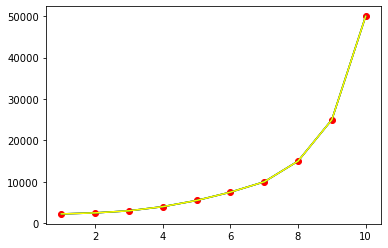

In [104]:
plt.scatter(x.values,y.values,color = "red")
plt.plot(x.values,r_dt.predict(x.values),color = "blue")
z = x +0.5
k = x-0.4
plt.plot(x.values,r_dt.predict(z),color = "green")
plt.plot(x.values,r_dt.predict(k),color = "yellow")
#burada bütün değerler aynı gruba indirildi 

In [105]:
r_dt.predict([[11]])

array([50000.])

In [106]:
r_dt.predict([[6.6]])  #aralığa göre aynı değere dönderme sebebi karar ağacından dolayı
#çünkü o aralıktakileri aynı değere atıyor daima

array([10000.])

# Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
rf_reg = RandomForestRegressor(random_state=0 , n_estimators = 10 )   # estimaters kaç tane ağaç çizileceği sayısı

In [109]:
rf_reg.fit(x.values,y.values.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [110]:
rf_reg.predict([[6.5]])

array([8350.])

In [111]:
rf_reg.predict([[6.6]])

array([10500.])

In [112]:
rf_reg.predict([[8.4]])

array([19500.])

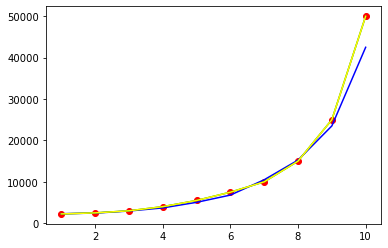

In [113]:
plt.scatter(x.values,y.values,color = "red")
plt.plot(x.values,rf_reg.predict(x.values),color = "blue")
plt.plot(x.values,r_dt.predict(z),color = "green")
plt.plot(x.values,r_dt.predict(k),color = "yellow")

# Değerlendirm ve Metotların karşılaştırılması

In [114]:
from sklearn.metrics import r2_score  #Rkare değerini hesaplıyoruz bu değer doğruluk oranını belirtir

In [115]:
r2_score(y.values,rf_reg.predict(x.values))  #YUkarıda random forest ile yaptığımız tahminin sonucu

0.9704434230386582

In [116]:
r2_score(y.values,r_dt.predict(x.values)) # Desicion tree r2 değeri bunda veriler basit olduğu için nokta atış yaptı
#veri sayısı kadar dallandırma koymuştuk   #bu sayı yüksek diye bunu almak kötü sonuçlar doğurur
#burada hangi veriye hangi algoritma uygulanır onun önemini anlıyoruz

1.0

In [117]:
r2_score(y_olcekli,svr_reg.predict(x_olcekli))  #Burada SUpport vektör regression algoritmasının sonucunu gösteriyor

NameError: name 'x_olcekli' is not defined

In [118]:
r2_score(y.values,lin_reg2.predict(poly_reg.fit_transform(x.values)))  # POlinom regression sonucu

NameError: name 'lin_reg2' is not defined

In [119]:
r2_score(y.values,lin_reg.predict(x.values))  #Linear regression r2 değeri

0.6690412331929894

In [120]:
#Yukarıdaki r2 değerleri veri setlerine göre verimlilliği değişir veri setinin tarzına bağlıdır

# Maaşlar Ödev (Predict Özet)

In [121]:
veriler = pd.read_csv("maaslar_yeni.csv")

In [122]:
veriler

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500
5,6,Sef,6,5,70,7500
6,7,Mudur,7,5,70,10000
7,8,Direktor,8,5,70,15000
8,9,C-level,9,5,70,25000
9,10,CEO,10,5,70,50000


In [123]:
# çalışan ıd si alınmaz overfittinge sebeb olur 
# unvanlar burada kukladır çünkü unvan seviyesi olarak ayrı bir kolon verilmiş oo yüzden gereksiz

In [124]:
#bağımlı değişkenimiz maaştır 
#ünvan seviyesi kıdem ve puanlar bağımsız değişkendir

In [125]:
x = veriler.iloc[:,2:5]  #unvan seviyesi kıdem ve puanı aldık
y = veriler.iloc[:,5:]  # sadece maaşı aldık
#veriler dataframe bunları values olarak almamız gerek 
X = x.values
Y = y.values

**Linear Regression**

In [126]:
from sklearn.linear_model import LinearRegression
lin_reg =  LinearRegression()
lin_reg.fit(X,Y) 

LinearRegression()

In [127]:
import statsmodels.api as sm
model = sm.OLS(lin_reg.predict(X),X)
model.fit().summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              83.89
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    8.38e-14
Time:                        04:26:47   Log-Likelihood:                         -295.74
No. Observations:                  30   AIC:                                      597.5
Df Residuals:                      27   BIC:                                      601.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2494.8107    256.145      9.740      0.000    1969.244    3020.377
x2             1.3531    318.990      0.004      0.997    -653.161     655.867
x3           -26.5687     33.657     -0.789      0.437     -95.626      42.489
==============================================================================
Omnibus:                        0.440   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.573
Skew:                           0.109   Prob(JB):                        0.751
Kurtosis:                       2.359   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
# x2 ve x3 değerlerinde P değerleri çok yüksek bu yüzden onları çıkartıp deneyelim

In [129]:
x = veriler.iloc[:,2:3] 
y = veriler.iloc[:,5:] 
X = x.values
Y = y.values

In [130]:
from sklearn.linear_model import LinearRegression
lin_reg =  LinearRegression()
lin_reg.fit(X,Y) 

LinearRegression()

In [131]:
import statsmodels.api as sm
model = sm.OLS(lin_reg.predict(X),X)
model.fit().summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              468.1
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    1.93e-19
Time:                        04:26:47   Log-Likelihood:                         -287.43
No. Observations:                  30   AIC:                                      576.9
Df Residuals:                      29   BIC:                                      578.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2269.9134    104.919     21.635      0.000    2055.330    2484.497
==============================================================================
Omnibus:                        5.870   Durbin-Watson:                   0.600
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                1.873
Skew:                          -0.000   Prob(JB):                        0.392
Kurtosis:                       1.776   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
# x2 ve x3 değerlerini çıkartınca R değeri büyüdü 

**Polynomial Regression**

In [133]:
x = veriler.iloc[:,2:5] 
y = veriler.iloc[:,5:] 
X = x.values
Y = y.values

In [134]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x.values)

In [135]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression()

In [136]:
model2 = sm.OLS(lin_reg2.predict(poly_reg.fit_transform(X)),X)
model2.fit().summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              19.11
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    7.49e-07
Time:                        04:26:47   Log-Likelihood:                         -317.93
No. Observations:                  30   AIC:                                      641.9
Df Residuals:                      27   BIC:                                      646.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2494.8107    536.645      4.649      0.000    1393.705    3595.916
x2             1.3531    668.311      0.002      0.998   -1369.907    1372.614
x3           -26.5687     70.513     -0.377      0.709    -171.250     118.113
==============================================================================
Omnibus:                       39.861   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.882
Skew:                           2.862   Prob(JB):                     3.42e-27
Kurtosis:                      11.046   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
# Aynı şekilde x2 ve x3 değerlerinin Pvalue değerleri yüksek onları çıkartabiliriz

In [138]:
x = veriler.iloc[:,2:3] 
y = veriler.iloc[:,5:] 
X = x.values
Y = y.values

In [139]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x.values)

In [140]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression()

In [141]:
model2 = sm.OLS(lin_reg2.predict(poly_reg.fit_transform(X)),X)
model2.fit().summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              91.39
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    1.82e-10
Time:                        04:26:47   Log-Likelihood:                         -311.94
No. Observations:                  30   AIC:                                      625.9
Df Residuals:                      29   BIC:                                      627.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2269.9134    237.448      9.560      0.000    1784.278    2755.548
==============================================================================
Omnibus:                       23.972   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.342
Skew:                           2.067   Prob(JB):                     3.49e-08
Kurtosis:                       6.223   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
# R2 değeri büyüdü

In [143]:
x = veriler.iloc[:,2:5] 
y = veriler.iloc[:,5:] 
X = x.values
Y = y.values

In [144]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_olcekli = sc1.fit_transform(x.values)
sc2 = StandardScaler()
y_olcekli = sc2.fit_transform(y.values)

In [145]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = "rbf")
svr_reg.fit(x_olcekli,y_olcekli)

SVR()

In [146]:
model3 = sm.OLS(svr_reg.predict(x_olcekli),x_olcekli)
model3.fit().summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              32.37
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    4.34e-09
Time:                        04:26:47   Log-Likelihood:                        -0.92453
No. Observations:                  30   AIC:                                      7.849
Df Residuals:                      27   BIC:                                      12.05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4715      0.049      9.709      0.000       0.372       0.571
x2             0.0674      0.051      1.314      0.200      -0.038       0.173
x3             0.0427      0.051      0.839      0.409      -0.062       0.147
==============================================================================
Omnibus:                        3.662   Durbin-Watson:                   0.494
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                2.279
Skew:                           0.464   Prob(JB):                        0.320
Kurtosis:                       2.019   Cond. No.                         1.44
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
# x3 değerini kaldırıp tekrardan deneyelim ve sonuca birdaha bakalım

In [148]:
x = veriler.iloc[:,2:4] 
y = veriler.iloc[:,5:] 
X = x.values
Y = y.values

In [149]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_olcekli = sc1.fit_transform(x.values)
sc2 = StandardScaler()
y_olcekli = sc2.fit_transform(y.values)

In [150]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = "rbf")
svr_reg.fit(x_olcekli,y_olcekli)

SVR()

In [151]:
model3 = sm.OLS(svr_reg.predict(x_olcekli),x_olcekli)
model3.fit().summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              44.99
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    1.80e-09
Time:                        04:26:48   Log-Likelihood:                         -2.8457
No. Observations:                  30   AIC:                                      9.691
Df Residuals:                      28   BIC:                                      12.49
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4803      0.051      9.477      0.000       0.376       0.584
x2             0.0806      0.051      1.591      0.123      -0.023       0.184
==============================================================================
Omnibus:                        3.061   Durbin-Watson:                   0.413
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.419
Skew:                           0.564   Prob(JB):                        0.298
Kurtosis:                       2.184   Cond. No.                         1.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
#değer düştü x2 yi kaldırıp birde öyle bakalım

In [153]:
x = veriler.iloc[:,2:3] 
y = veriler.iloc[:,5:] 
X = x.values
Y = y.values

In [154]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_olcekli = sc1.fit_transform(x.values)
sc2 = StandardScaler()
y_olcekli = sc2.fit_transform(y.values)

In [155]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = "rbf")
svr_reg.fit(x_olcekli,y_olcekli)

SVR()

In [156]:
model3 = sm.OLS(svr_reg.predict(x_olcekli),x_olcekli)
model3.fit().summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              97.19
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    9.11e-11
Time:                        04:26:48   Log-Likelihood:                         -1.3680
No. Observations:                  30   AIC:                                      4.736
Df Residuals:                      29   BIC:                                      6.137
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4636      0.047      9.858      0.000       0.367       0.560
==============================================================================
Omnibus:                        9.456   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                2.433
Skew:                           0.179   Prob(JB):                        0.296
Kurtosis:                       1.652   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
# sadece x1 ile R2 değeri daha düşük çıktı 
# Bu tahmin algoritmasında 3 değişkenide kullanarak yapılan tahmin daha doğru sonuçlar veriyor

**Desicion Tree**

In [158]:
x = veriler.iloc[:,2:5] 
y = veriler.iloc[:,5:] 
X = x.values
Y = y.values

In [159]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state = 0)
r_dt.fit(x.values,y.values)

DecisionTreeRegressor(random_state=0)

In [160]:
model4 = sm.OLS(r_dt.predict(X),X)
model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              19.08
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    7.62e-07
Time:                        04:26:48   Log-Likelihood:                         -317.95
No. Observations:                  30   AIC:                                      641.9
Df Residuals:                      27   BIC:                                      646.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2494.8107    537.146      4.645      0.000    1392.677    3596.944
x2             1.3531    668.935      0.002      0.998   -1371.187    1373.894
x3           -26.5687     70.579     -0.376      0.710    -171.385     118.248
==============================================================================
Omnibus:                       40.370   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.722
Skew:                           2.897   Prob(JB):                     5.01e-28
Kurtosis:                      11.186   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
# x2 ve x3 değerlerini atabiliriz

In [162]:
x = veriler.iloc[:,2:3] 
y = veriler.iloc[:,5:] 
X = x.values
Y = y.values

In [163]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state = 0)
r_dt.fit(x.values,y.values)

DecisionTreeRegressor(random_state=0)

In [164]:
model4 = sm.OLS(r_dt.predict(X),X)
model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              87.29
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    3.01e-10
Time:                        04:26:50   Log-Likelihood:                         -312.62
No. Observations:                  30   AIC:                                      627.2
Df Residuals:                      29   BIC:                                      628.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2269.9134    242.950      9.343      0.000    1773.025    2766.802
==============================================================================
Omnibus:                       27.769   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.942
Skew:                           2.292   Prob(JB):                     1.06e-10
Kurtosis:                       6.968   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
# R2 Değeri büyüdü

**Random Forest**

In [166]:
x = veriler.iloc[:,2:5] 
y = veriler.iloc[:,5:] 
X = x.values
Y = y.values

In [167]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0 , n_estimators = 10 )   # estimaters kaç tane ağaç çizileceği sayısı
rf_reg.fit(x.values,y.values.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [168]:
model5 = sm.OLS(rf_reg.predict(X),X)
model5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.713
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                              22.31
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    1.79e-07
Time:                        04:26:53   Log-Likelihood:                         -316.07
No. Observations:                  30   AIC:                                      638.1
Df Residuals:                      27   BIC:                                      642.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2671.9265    504.444      5.297      0.000    1636.892    3706.961
x2             1.0522    628.209      0.002      0.999   -1287.927    1290.031
x3           -44.2927     66.282     -0.668      0.510    -180.293      91.707
==============================================================================
Omnibus:                       32.588   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.156
Skew:                           2.425   Prob(JB):                     1.30e-16
Kurtosis:                       8.916   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
# x2 ve x3 değerlerini kaldırabiliriz Pvalue değerleri çok yüksek

In [170]:
x = veriler.iloc[:,2:3] 
y = veriler.iloc[:,5:] 
X = x.values
Y = y.values

In [171]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0 , n_estimators = 10 )   # estimaters kaç tane ağaç çizileceği sayısı
rf_reg.fit(x.values,y.values.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [172]:
model5 = sm.OLS(rf_reg.predict(X),X)
model5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              74.13
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    1.75e-09
Time:                        04:26:55   Log-Likelihood:                         -315.35
No. Observations:                  30   AIC:                                      632.7
Df Residuals:                      29   BIC:                                      634.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2290.6820    266.050      8.610      0.000    1746.548    2834.816
==============================================================================
Omnibus:                       28.961   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.982
Skew:                           2.369   Prob(JB):                     1.40e-11
Kurtosis:                       7.189   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**5 PREDİCT YÖNTEMİNİN YORUMLANMASI** 

Tüm yöntemlerde tek parametreli olanlar yüksek sonuç verdi

Linear R2 = 0.942

Polynomial R2 = 0.782

SVR R2 = 0.770  # burada 3 parametreli olan 0.782 Çıktı

Desicion Tree R2 = 0.751

Random Forest R2 = 0.719

In [173]:
# 3 Parametreli değerleri isterseniz yukarıdaki tablolardan inceleyebilirsiniz

In [174]:
veriler.corr()

,Calisan ID,UnvanSeviyesi,Kidem,Puan,maas
Calisan ID,1.000000,0.331847,0.206278,-0.251278,0.226287
UnvanSeviyesi,0.331847,1.000000,-0.125200,0.034948,0.727036
Kidem,0.206278,-0.125200,1.000000,0.322796,0.117964
Puan,-0.251278,0.034948,0.322796,1.000000,0.201474
maas,0.226287,0.727036,0.117964,0.201474,1.000000


Korelasyon tablosuna bakarak kolonların birbirleriyle etkileşimleri gözükür